In [36]:
import json
import sys
import numpy as np
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
from ast import literal_eval
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'

In [31]:
def better_loglike(lam, k):
	"""
	Calculate Poisson log likelihood
	Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

	Params: 
	- lam: model predictions for transit multiplicity (list of ints)
	- k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

	Returns: Poisson log likelihood (float)
	"""

	logL = []
	#print(lam)
	for i in range(len(lam)):
		if lam[i]==0:
			term3 = -lgamma(k[i]+1)
			term2 = -lam[i]
			term1 = 0
			logL.append(term1+term2+term3)

		else:
			term3 = -lgamma(k[i]+1)
			term2 = -lam[i]
			term1 = k[i]*np.log(lam[i])
			logL.append(term1+term2+term3)

	return np.sum(logL)

berger_kepler = pd.read_csv(path+'berger_kepler_stellar17.csv') # crossmatched with Gaia via Bedell
pnum = pd.read_csv(path+'pnum_plus_cands.csv')
pnum = pnum.drop_duplicates(['kepid'])
k = pnum.koi_count.value_counts() 
k = pd.Series([len(berger_kepler)-np.sum(k), 244, 51, 12, 8, 1, 0]) 
print("k: ", k)

k:  0    19653
1      244
2       51
3       12
4        8
5        1
6        0
dtype: int64


/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df = pd.read_csv('logLs.csv')
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(literal_eval) # convert back from string to list of floats
df.max_logLs = df.max_logLs.apply(literal_eval) # convert back from string to list of floats
df.min_logLs = df.min_logLs.apply(literal_eval) # convert back from string to list of floats
df.mean_logLs = df.mean_logLs.apply(literal_eval) # convert back from string to list of floats
df.median_logLs = df.median_logLs.apply(literal_eval) # convert back from string to list of floats
df.std_logLs = df.std_logLs.apply(literal_eval) # convert back from string to list of floats

df.max_logLs = df.max_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.min_logLs = df.min_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.mean_logLs = df.mean_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.median_logLs = df.median_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.std_logLs = df.std_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(lambda y: np.nan if len(y)==0 else y)

print(df.transit_multiplicities_all[0][0])
print(df)
print(max(df.max_logLs))

[1049, 94]
        ms   bs            cs   fs      max_logLs      min_logLs  \
0     -2.0  0.0  1.000000e+08  0.0 -175743.107503 -175743.107503   
1     -2.0  0.0  1.000000e+08  0.1  -83865.117639  -87558.177445   
2     -2.0  0.0  1.000000e+08  0.2  -70187.868187  -73861.127993   
3     -2.0  0.0  1.000000e+08  0.3  -62234.628931  -65888.088737   
4     -2.0  0.0  1.000000e+08  0.4  -56624.918736  -60258.578542   
...    ...  ...           ...  ...            ...            ...   
14636  0.0  1.0  1.000000e+10  0.6            NaN            NaN   
14637  0.0  1.0  1.000000e+10  0.7            NaN            NaN   
14638  0.0  1.0  1.000000e+10  0.8            NaN            NaN   
14639  0.0  1.0  1.000000e+10  0.9            NaN            NaN   
14640  0.0  1.0  1.000000e+10  1.0            NaN            NaN   

          mean_logLs   median_logLs    std_logLs  \
0     -175743.107503 -175743.107503     0.000000   
1      -85350.733210  -85037.099447  1248.755595   
2      -71665.93

In [3]:
# redo ms because I forgot that I rounded to single decimal beforehand
ms_corrected = []
ms_corrected_for_plotting = []
for gi_m in range(11):
    for gi_b in range(11):
        ms = -1e-9*np.logspace(8,10,11)[gi_m]
        ms_corrected.append(ms)
        ms_for_plotting = np.log10(np.logspace(8,10,11))[gi_m]
        ms_corrected_for_plotting.append(ms_for_plotting)
print(ms_corrected)
print(ms_corrected_for_plotting)

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944

In [4]:
df.cs.unique()

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

In [5]:
df_billion = df.loc[(df.cs > 1e8) & (df.cs < 2e8)]
point_two = df_billion.loc[df.fs == 0.2]
#print(point_two)


bs = point_two.bs
logLs = point_two.mean_logLs
print(logLs)
print(bs)
print(point_two.ms)

13      -73971.566512
134     -70918.856919
255     -71276.362566
376     -71085.290272
497     -70896.686375
             ...     
14049             NaN
14170             NaN
14291             NaN
14412             NaN
14533             NaN
Name: mean_logLs, Length: 121, dtype: float64
13       0.0
134      0.1
255      0.2
376      0.3
497      0.4
        ... 
14049    0.6
14170    0.7
14291    0.8
14412    0.9
14533    1.0
Name: bs, Length: 121, dtype: float64
13      -2.0
134     -2.0
255     -2.0
376     -2.0
497     -2.0
        ... 
14049    0.0
14170    0.0
14291    0.0
14412    0.0
14533    0.0
Name: ms, Length: 121, dtype: float64


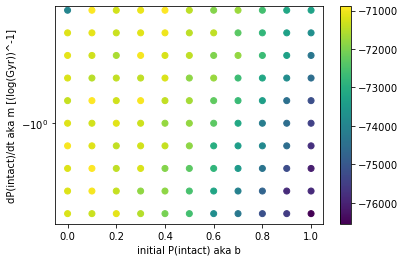

In [12]:
#plt.scatter(bs, [-1*m for m in ms_corrected], c=logLs) # mean_logLs2 for mean instead of peak location of KDE
plt.scatter(bs, point_two.ms, c=logLs)
plt.xlabel('initial P(intact) aka b')
plt.ylabel('dP(intact)/dt aka m [(log(Gyr))^-1]')
plt.gca().invert_yaxis()
plt.yscale('symlog')
#plt.yscale('log')
plt.colorbar()
plt.show()

In [7]:
print(-1e-9*np.logspace(8,10,11))
print(df.ms)

[ -0.1         -0.15848932  -0.25118864  -0.39810717  -0.63095734
  -1.          -1.58489319  -2.51188643  -3.98107171  -6.30957344
 -10.        ]
0       -2.0
1       -2.0
2       -2.0
3       -2.0
4       -2.0
        ... 
14636    0.0
14637    0.0
14638    0.0
14639    0.0
14640    0.0
Name: ms, Length: 14641, dtype: float64


What's going on with these atrocious logLs? Let's inspect one middle of the road simulation.

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


['Unnamed: 0', 'kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg', 'logg_err1', 'logg_err2', 'feh_x', 'feh_err1', 'feh_err2', 'mass', 'mass_err1', 'mass_err2', 'st_radius', 'radius_err1', 'radius_err2', 'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi', 'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'degree_ra', 'degree_dec', 'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err', 'hmag', 'hmag_err', 'kmag_x', 'kmag_err_x', 'dutycycle', 'dataspan', 'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0', 'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0', 'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0', 'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0', 'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrmscdpp04p5', 'rrmscdpp05p0', 'rrmscdpp06p0', 'rrmscdpp07p5', 'rrmscdpp09p0', 'rrmscdpp10p5', 'rrmscdpp12p0', 'rrmscdpp12p5', 'rrmscdpp15p

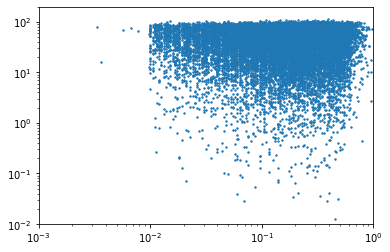

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


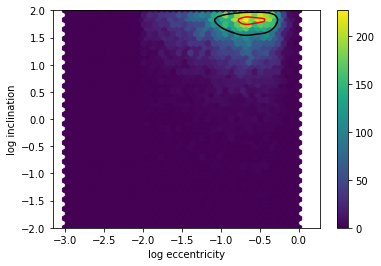

In [62]:
df = pd.read_csv('transits5_5_2_4.csv')
#print(df.head())
print(list(df.columns))
plt.scatter(df.ecc, df.incl*180/np.pi, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-3,1e0)
plt.ylim(1e-2,2e2)
plt.show()

# I'M MISSING THE MIDPLANE! SO NO MUTUAL INCLINATIONS :(
plt.hexbin(df.ecc, df.incl*180/np.pi, gridsize=40, yscale='log', xscale='log', extent=(-3, 0, -2, 2))
fig2 = sns.kdeplot(np.array(df.ecc), np.array(np.abs(df.incl)*180/np.pi), yscale='log', xscale='log', legend = True, 
                   levels=[0.68, 0.95], colors=['black','red'])
plt.ylim(-2, 2)
#plt.xlim(0, 0.5)
plt.xlabel('log eccentricity')
plt.ylabel('log inclination')
plt.colorbar()
plt.show()

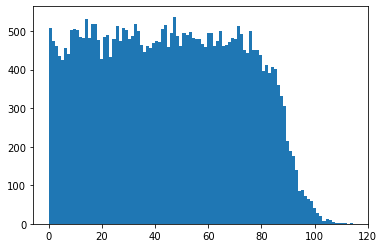

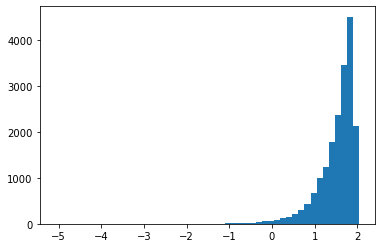

In [48]:
plt.hist(np.abs(df.incl)*180/np.pi, bins=100)
plt.show()

plt.hist(np.log10(df.incl*180/np.pi), bins=50)
plt.show()

uh oh

In [34]:
# isolate transiting planets
transiters_berger_kepler = df.loc[df['transit_status']==1]

# compute transit multiplicity and save off the original transit multiplicity (pre-frac)
transit_multiplicity = transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
print(transit_multiplicity)

# calculate logLs for different fracs and keep the best one
logL = better_loglike(transit_multiplicity, k)
print(logL)

0    1111
1     162
2      35
3      22
4       5
5       2
Name: kepid, dtype: int64
-37962.95218264356


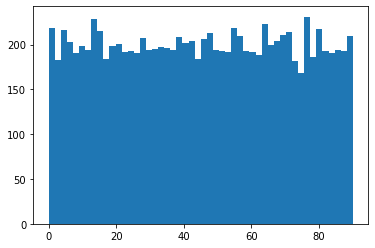

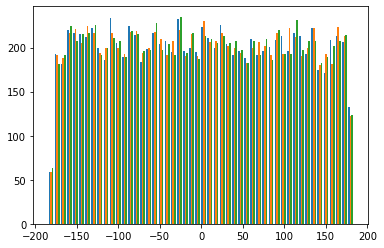

In [61]:
midplanes = []
incls = []
sigma = np.pi/90
for i in range(10000):
    midplane = np.random.uniform(-np.pi/2,np.pi/2,1)
    midplanes.append(midplane)
    
    incl = np.random.normal(midplane, sigma, 3)
    incl = midplane + incl
    incls.append(incl)

plt.hist(np.array(np.abs(midplanes))*180/np.pi, bins=50)
plt.show()

plt.hist(np.array(incls)*180/np.pi, bins=50)
plt.show()